In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (25, 9)

Populating the interactive namespace from numpy and matplotlib


C:\Users\hp\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['mod', 'ma']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [100]:
df = pd.read_csv("clean_metal.csv")
df.head()

,Date,p0,Price,p2,f000_settle,f001_settle,f002_settle,f003_settle,f004_settle,f005_settle,...,f128_settle,f129_settle,f130_settle,f131_settle,f132_settle,f133_settle,f134_settle,f135_settle,f136_settle,f137_settle
0,2008-12-01,444.511058,457.032497,457.032497,56.29,51.91,0.6421,31.40,31.83,1.4924,...,514.4,516.4,12545.0,12560.0,28410.0,27300.0,11655.0,10690.0,9540.0,9650.0
1,2008-12-02,446.908899,465.530103,459.323035,55.30,51.78,0.6354,30.77,31.20,1.4895,...,504.8,504.8,12185.0,12215.0,28260.0,27040.0,11190.0,10300.0,9510.0,9630.0
2,2008-12-03,453.484820,482.060575,459.696940,55.21,51.21,0.6387,30.58,30.98,1.4734,...,497.7,497.7,11715.0,11830.0,27800.0,26530.0,10605.0,10050.0,9500.0,9590.0
3,2008-12-04,447.532919,472.395859,459.964389,57.62,53.94,0.6413,29.50,29.87,1.4746,...,490.1,490.1,11250.0,11240.0,26760.0,25530.0,10055.0,9735.0,9145.0,9225.0
4,2008-12-05,447.084228,471.922241,459.503235,56.75,53.58,0.6404,28.55,28.93,1.4696,...,496.3,496.3,10685.0,10590.0,25450.0,24270.0,9965.0,9150.0,8665.0,8715.0


In [101]:
df = df.set_index(pd.DatetimeIndex(df['Date']))
del df['Date']
df.head()

,p0,Price,p2,f000_settle,f001_settle,f002_settle,f003_settle,f004_settle,f005_settle,f006_settle,...,f128_settle,f129_settle,f130_settle,f131_settle,f132_settle,f133_settle,f134_settle,f135_settle,f136_settle,f137_settle
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,444.511058,457.032497,457.032497,56.29,51.91,0.6421,31.40,31.83,1.4924,1.4938,...,514.4,516.4,12545.0,12560.0,28410.0,27300.0,11655.0,10690.0,9540.0,9650.0
2008-12-02,446.908899,465.530103,459.323035,55.30,51.78,0.6354,30.77,31.20,1.4895,1.4911,...,504.8,504.8,12185.0,12215.0,28260.0,27040.0,11190.0,10300.0,9510.0,9630.0
2008-12-03,453.484820,482.060575,459.696940,55.21,51.21,0.6387,30.58,30.98,1.4734,1.4757,...,497.7,497.7,11715.0,11830.0,27800.0,26530.0,10605.0,10050.0,9500.0,9590.0
2008-12-04,447.532919,472.395859,459.964389,57.62,53.94,0.6413,29.50,29.87,1.4746,1.4769,...,490.1,490.1,11250.0,11240.0,26760.0,25530.0,10055.0,9735.0,9145.0,9225.0
2008-12-05,447.084228,471.922241,459.503235,56.75,53.58,0.6404,28.55,28.93,1.4696,1.4717,...,496.3,496.3,10685.0,10590.0,25450.0,24270.0,9965.0,9150.0,8665.0,8715.0


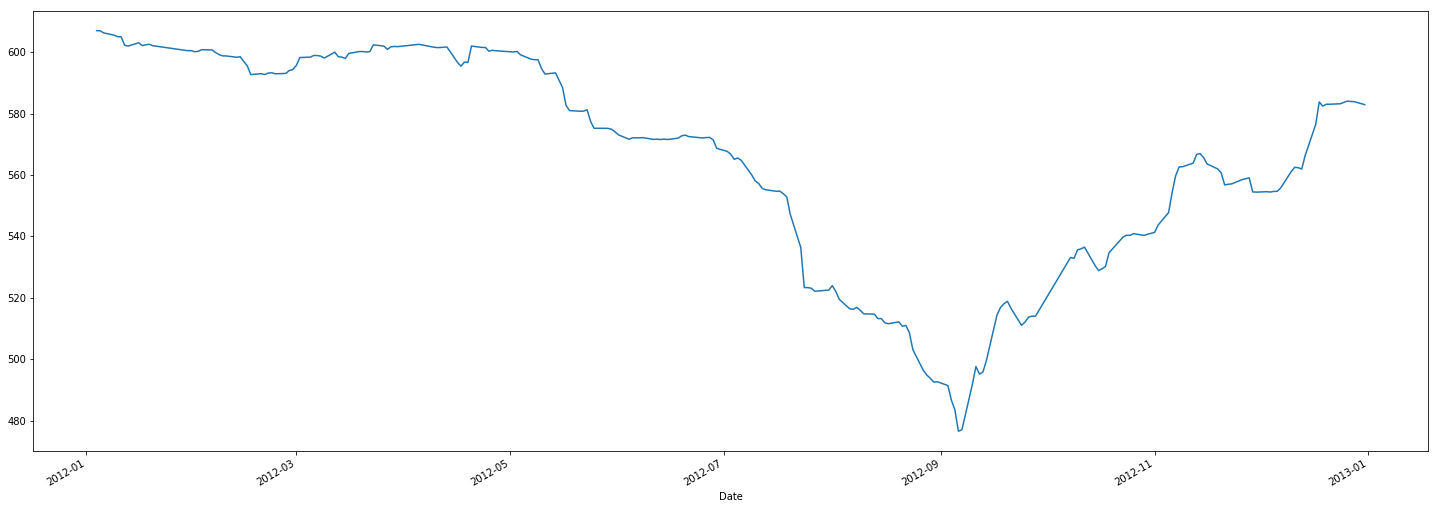

In [102]:
pylab.rcParams['figure.figsize'] = (25, 9)
df['2012']['Price'].plot()

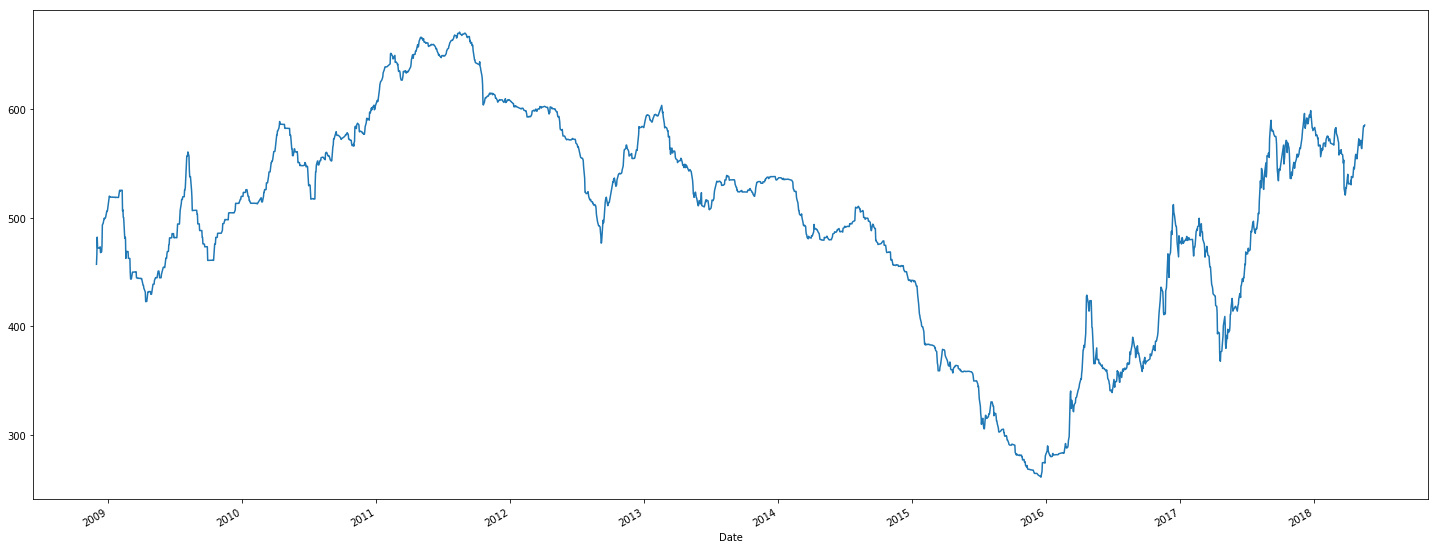

In [103]:
pylab.rcParams['figure.figsize'] = (25, 10)
df['Price'].plot()

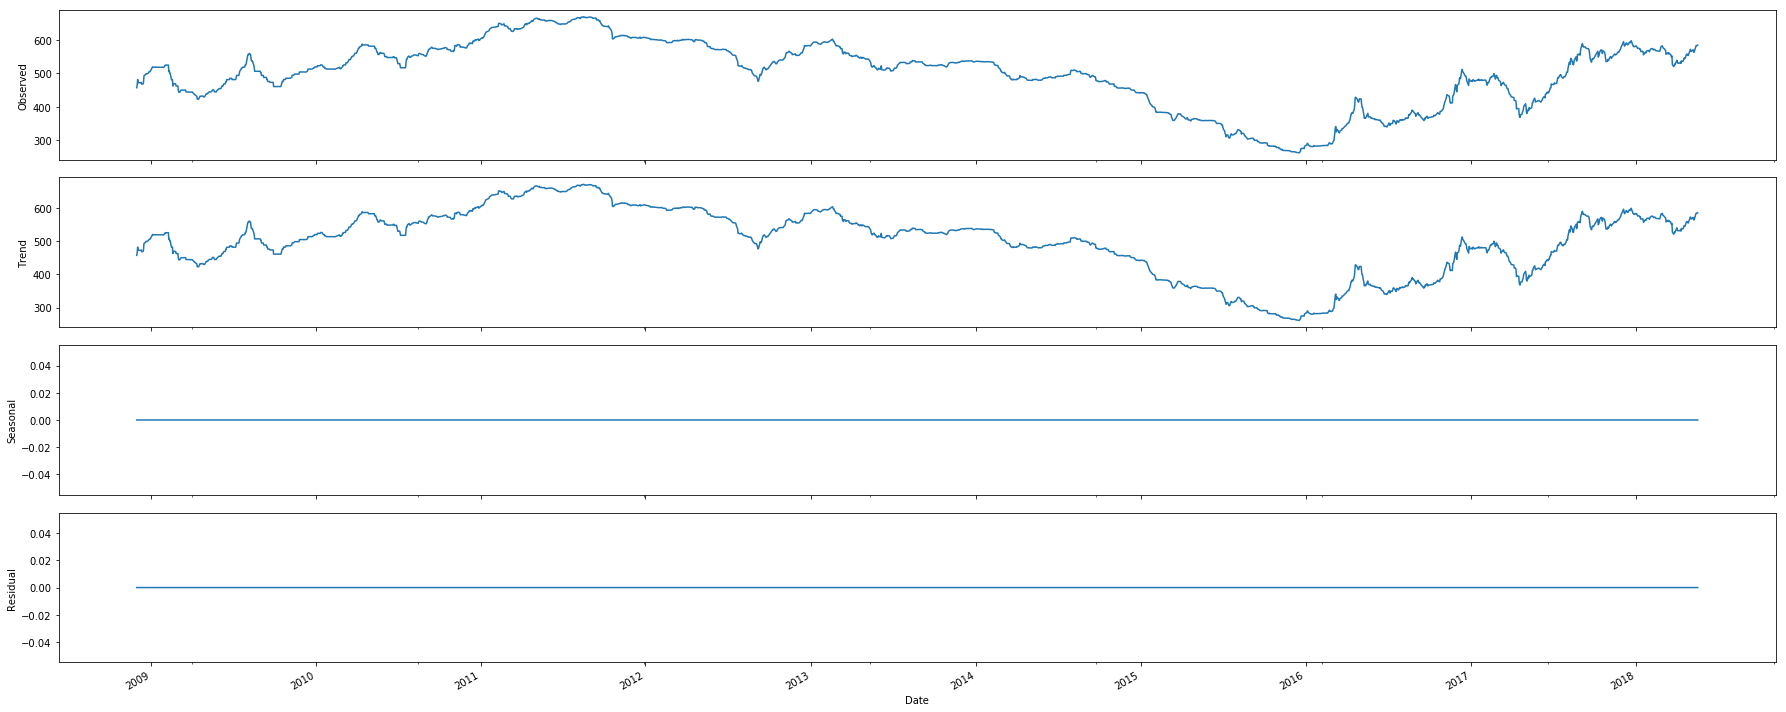

In [104]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(df['Price'],freq=1, model='additive')
fig = decomposition.plot()
pylab.rcParams['figure.figsize'] = (25, 40)
plt.show()
# Checking if there are trends/seasonality

### Mean Reversion - 
##### Following large jumps, either up or down, stock prices tend to reverse. 
##### This is described as mean reversion in stock prices: prices tend to bounce back, or revert, towards previous levels after large moves, which are observed over time horizons of about a week. A more mathematical way to describe mean reversion is to say that stock returns are negatively autocorrelated.

In [105]:
pylab.rcParams['figure.figsize'] = (25, 10)

In [106]:
#Calculating Percent Change
dfp=df['Price'].pct_change()
dfp.head()

Date
2008-12-01         NaN
2008-12-02    0.018593
2008-12-03    0.035509
2008-12-04   -0.020049
2008-12-05   -0.001003
Name: Price, dtype: float64

In [107]:
p1=pd.DataFrame(df['Price'],index=df.index)
p1.head()

,Price
Date,
2008-12-01,457.032497
2008-12-02,465.530103
2008-12-03,482.060575
2008-12-04,472.395859
2008-12-05,471.922241


In [108]:
Annual=p1.resample(rule='A').last()
Weekly=p1.resample(rule='W').last()
Monthly=p1.resample(rule='M').last()
Daily=p1.resample(rule='D').last()

In [109]:
Annual['Price_Change']=Annual['Price'].diff()
Annual.dropna(inplace=True)
Weekly['Price_Change']=Weekly['Price'].diff()
Weekly.dropna(inplace=True)
Monthly['Price_Change']=Monthly['Price'].diff()
Monthly.dropna(inplace=True)
Daily['Price_Change']=Daily['Price'].diff()
Daily.dropna(inplace=True)

In [110]:
Annual['Price_Change'].autocorr()

0.11734996142352931

In [111]:
Weekly['Price_Change'].autocorr()

0.2465287884063205

In [112]:
Monthly['Price_Change'].autocorr()

0.24977347370106118

In [113]:
Daily['Price_Change'].autocorr()

0.1436341838959799

### A Monthly/Weekly move up or down in price rates is more significant than Annual/Daily move. We will have more data when selecting to sample Weekly, hence we choose 'Weekly'.

In [114]:
Weekly.head()

,Price,Price_Change
Date,,
2008-12-14,467.806318,-4.115923
2008-12-21,494.466420,26.660102
2008-12-28,500.461613,5.995193
2009-01-04,506.761893,6.300280
2009-01-11,518.970627,12.208735


In [115]:
from statsmodels.graphics.tsaplots import plot_acf

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


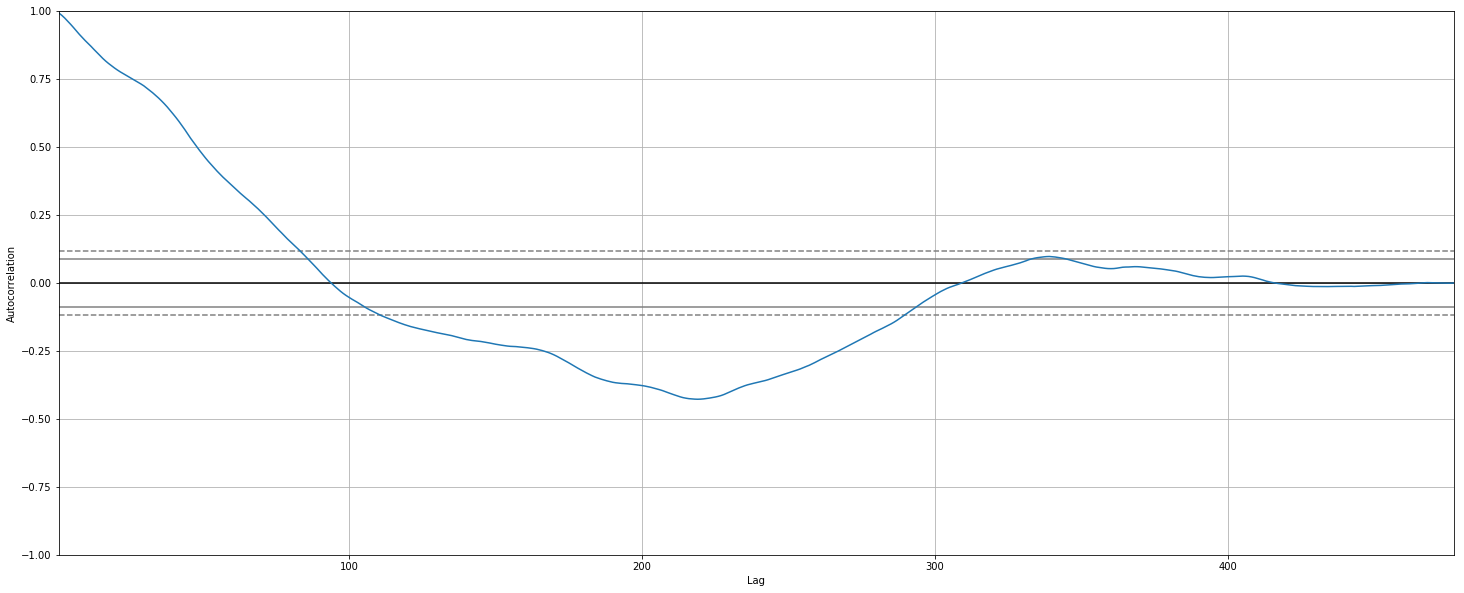

In [116]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(Weekly['Price'])
pyplot.show()

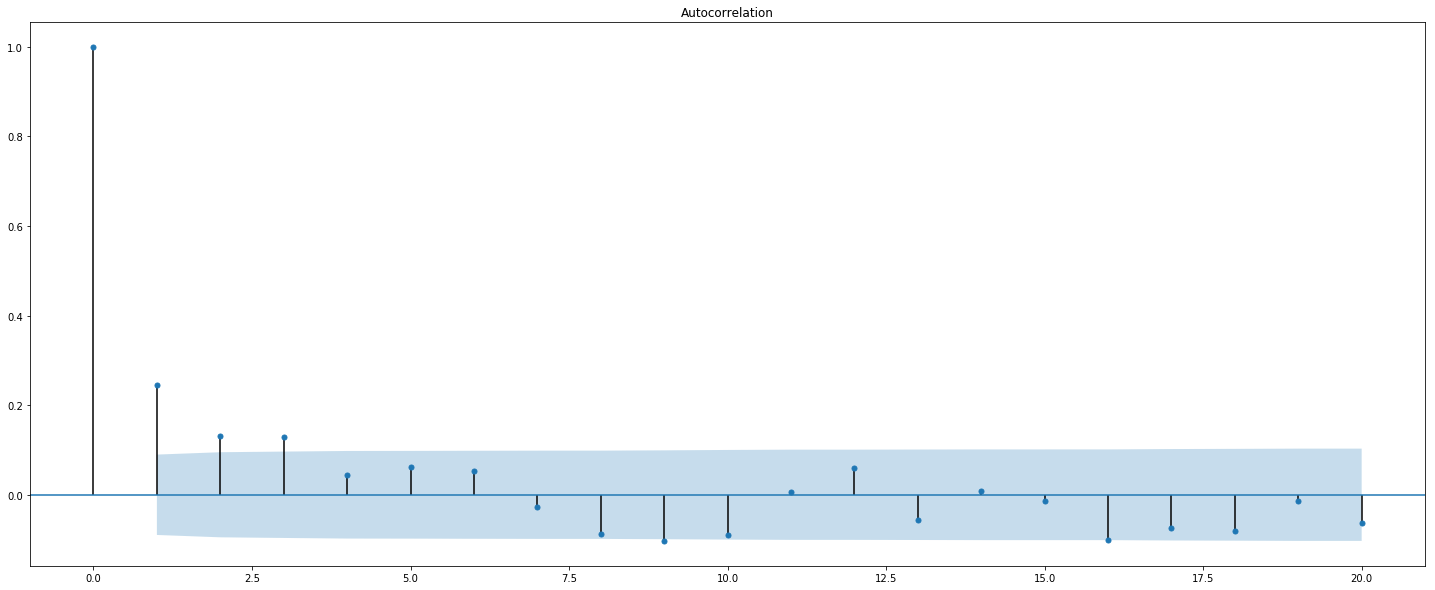

In [117]:
W=plot_acf(Weekly['Price_Change'].astype(float), lags= 20, alpha=0.05)

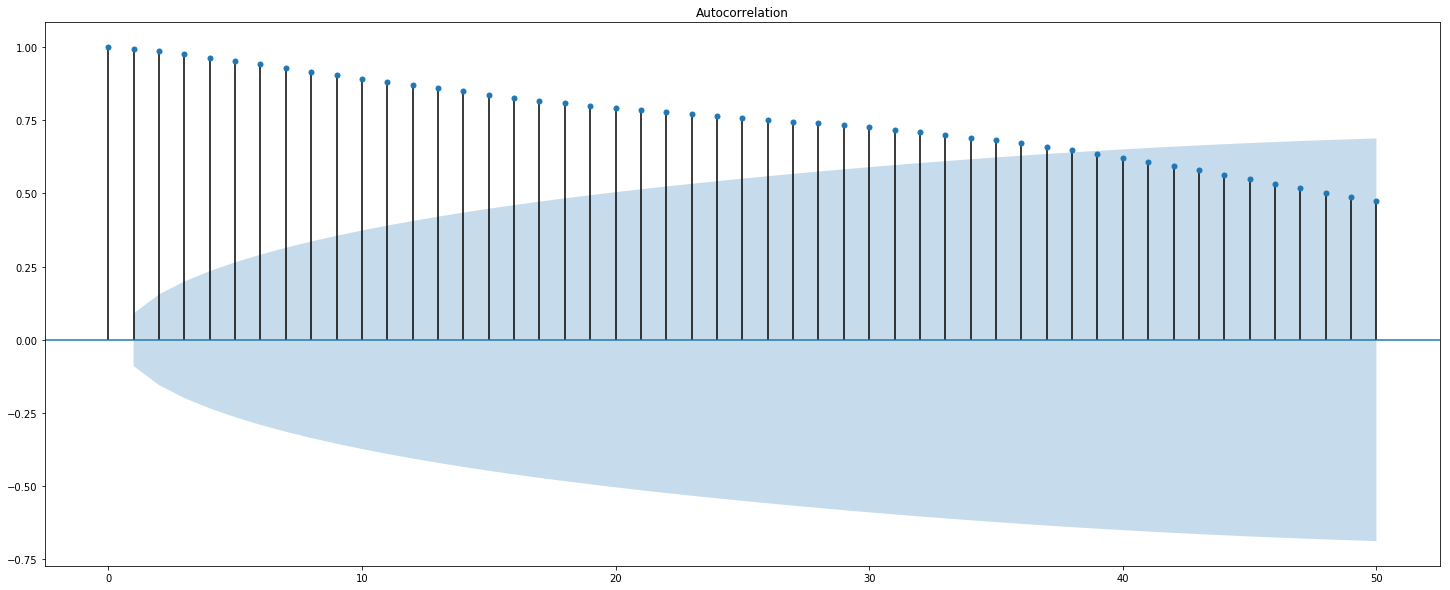

In [118]:
W=plot_acf(Weekly['Price'].astype(float), lags= 50, alpha=0.05)

In [119]:
#For Weekly, order of MA is around 35

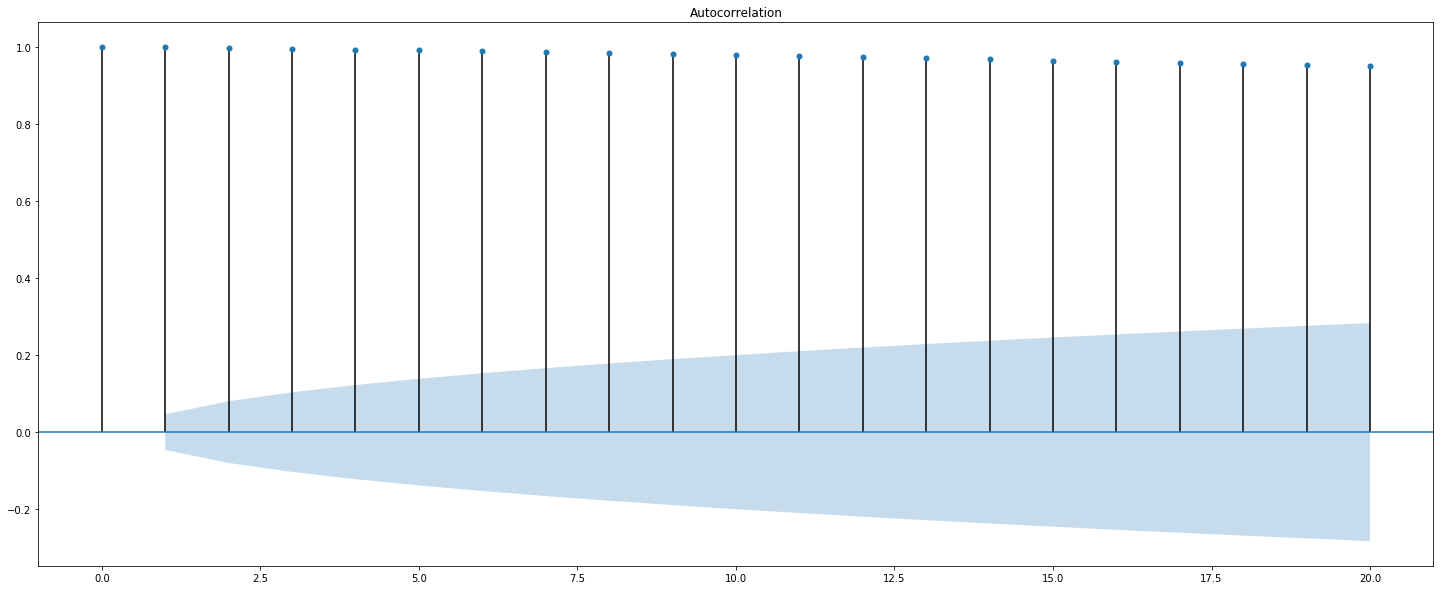

In [120]:
D=plot_acf(Daily['Price'].astype(float), lags= 20, alpha=0.05)

In [121]:
#Test to see if series is a Random Walk using Augmented Dicky-Fuller test
from statsmodels.tsa.stattools import adfuller

In [122]:
print(adfuller(Annual['Price']))
print(adfuller(Monthly['Price']))
print(adfuller(Weekly['Price']))
print(adfuller(Daily['Price']))
#results[0] is the test statistic, and results[1] is the p-value

(-1.6899683748660996, 0.4362883425728085, 2, 7, {'1%': -4.9386902332361515, '5%': -3.477582857142857, '10%': -2.8438679591836733}, -118.80333434870272)
(-2.20331380818744, 0.20504493488319048, 10, 102, {'1%': -3.4961490537199116, '5%': -2.8903209639580556, '10%': -2.5821223452518263}, 909.6970409450347)
(-1.609903843963846, 0.47861679368943333, 3, 473, {'1%': -3.444250937448703, '5%': -2.867669873870454, '10%': -2.5700349866579657}, 3399.9288645584757)
(-1.493913952148717, 0.5365198426304728, 8, 1782, {'1%': -3.4340249409468155, '5%': -2.8631632820375903, '10%': -2.5676341842417187}, 10353.42774603481)


In [123]:
#We cannot reject the null hypothesis that series is a Random Walk. Most stock prices are random walks.

In [124]:
print(adfuller(Annual['Price_Change']))
print(adfuller(Monthly['Price_Change']))
print(adfuller(Weekly['Price_Change']))
print(adfuller(Daily['Price_Change']))
#results[0] is the test statistic, and results[1] is the p-value

(-1.6275458203657236, 0.4687755880588252, 2, 7, {'1%': -4.9386902332361515, '5%': -3.477582857142857, '10%': -2.8438679591836733}, -inf)
(-1.9281560606114683, 0.3189337166186088, 9, 103, {'1%': -3.4954932834550623, '5%': -2.8900369024285117, '10%': -2.5819706975209726}, 913.3457909902367)
(-9.809398833825895, 5.71033991786448e-17, 2, 474, {'1%': -3.4442214494657586, '5%': -2.8676569002144148, '10%': -2.5700280720682227}, 3381.990366467126)
(-9.479492085980928, 3.9074951387703794e-16, 12, 1778, {'1%': -3.4340332205127657, '5%': -2.8631669370039785, '10%': -2.567636130407771}, 9320.113834532613)


C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:846: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


In [125]:
#Weekly and Daily Price_Change series aren't random walks and hence can be better forecasted

# AR Model

In [126]:
stock=Weekly.copy()
stock.head()

,Price,Price_Change
Date,,
2008-12-14,467.806318,-4.115923
2008-12-21,494.466420,26.660102
2008-12-28,500.461613,5.995193
2009-01-04,506.761893,6.300280
2009-01-11,518.970627,12.208735


0.14783619496855185

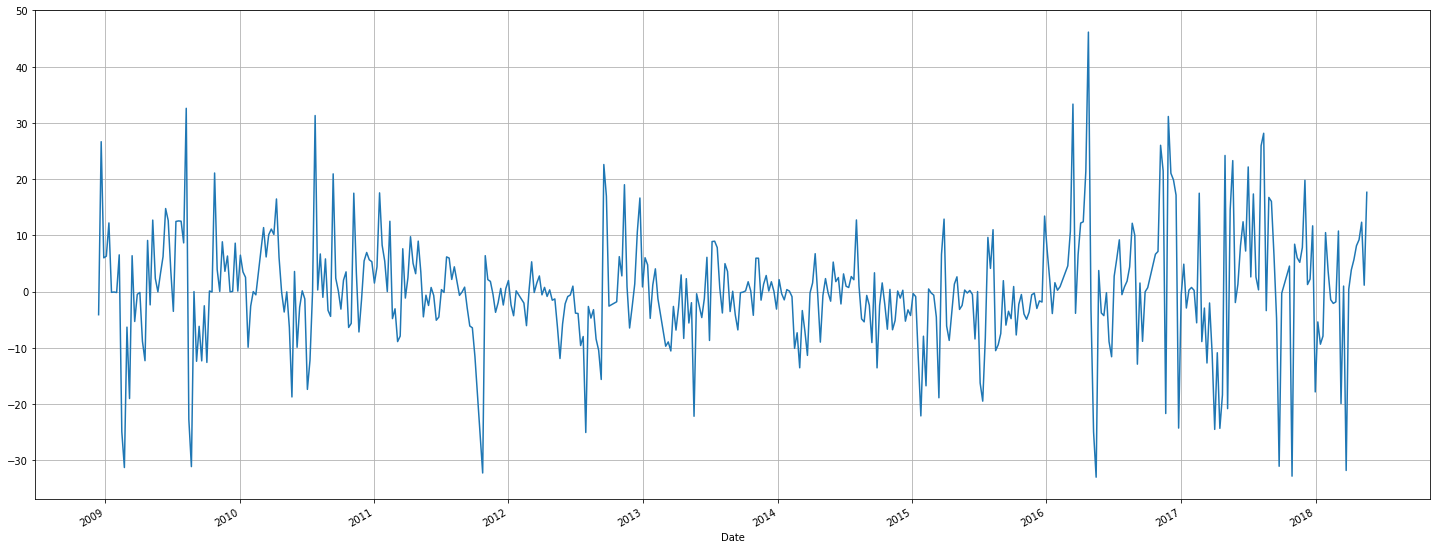

In [127]:
#Stock Price Change
stock['Price_Change'].plot(grid = True)
stock['Price_Change'].mean()

0.0007238388017722562

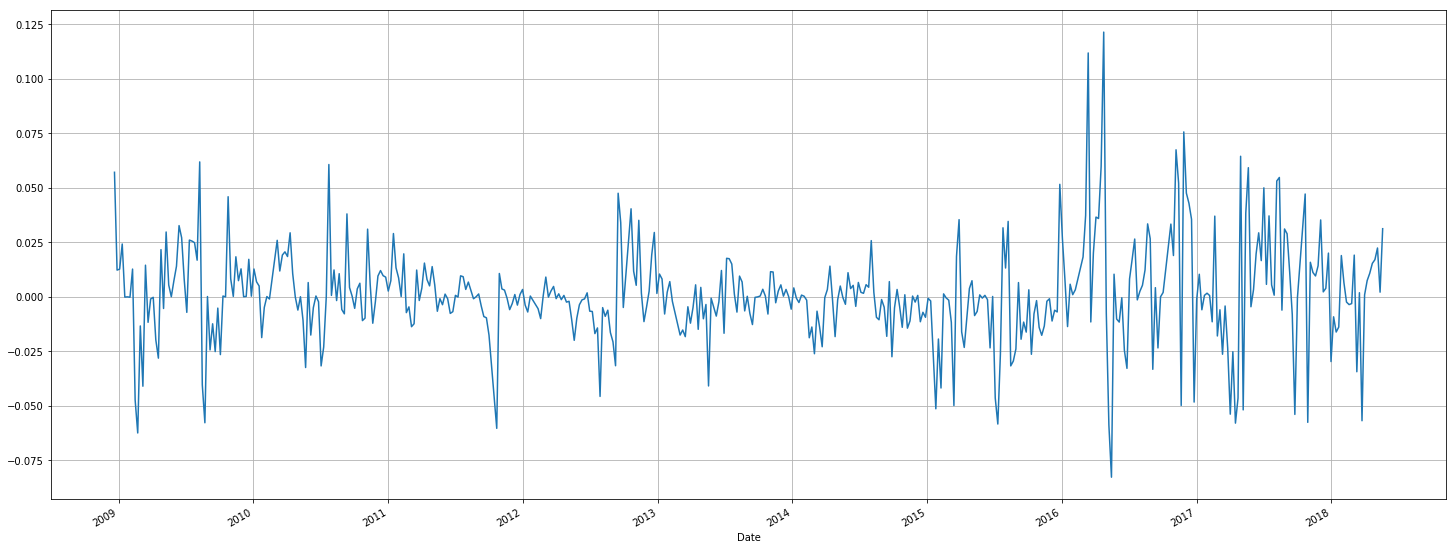

In [128]:
#Stock Percent Change (Stock Return)
stock['Return'] = stock['Price'].pct_change()
stock['Return'].plot(grid=True)
stock['Return'].mean()

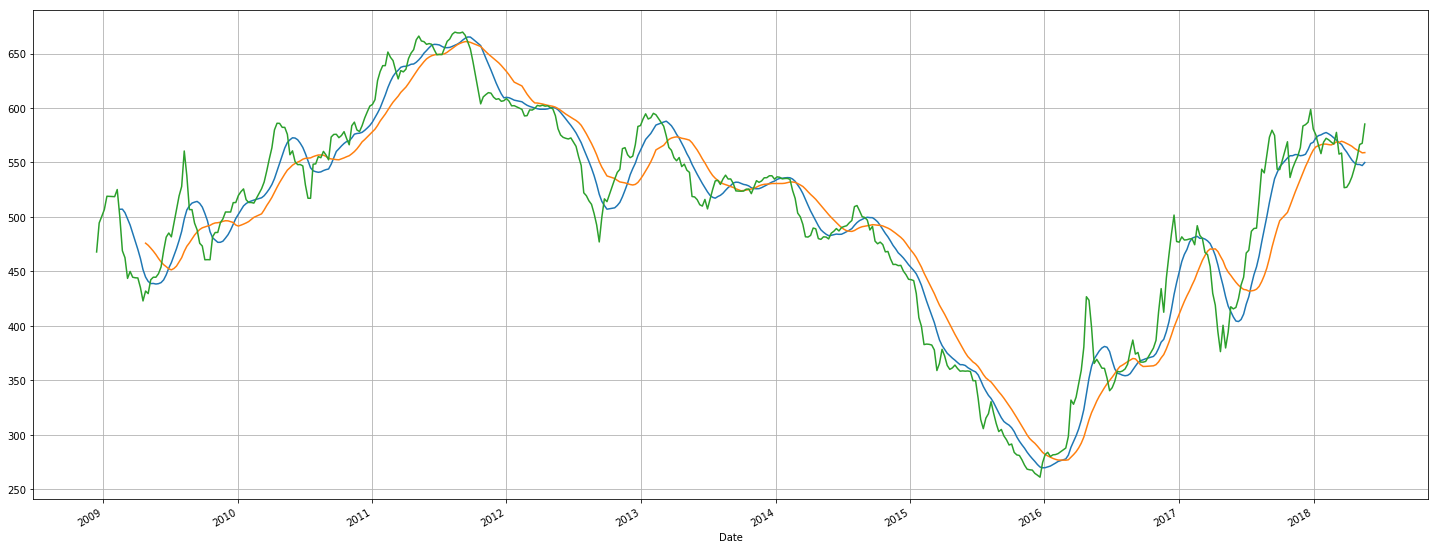

In [129]:
#Moving Average - 5 and 50 Weeks
stock['5W'] = stock['Price'].rolling(window=10, center=False).mean()
stock['50W'] = stock['Price'].rolling(window=20, center=False).mean()
stock['5W'].plot(grid=True)
stock['50W'].plot(grid=True)
stock['Price'].plot(grid=True)

In [130]:
stock1=stock.copy()
stock1['W3'] = stock1['Price'].shift(1).rolling(window=3).mean() 

#stock1['W50']= stock1['Price'].shift(1).rolling(window=50).mean() 

stock1= stock1.dropna()

y = stock1['Price']

X = stock1[['W3','Return']] 

X.head()

,W3,Return
Date,,
2009-04-26,433.975447,0.021517
2009-05-03,429.971206,-0.005477
2009-05-10,428.117660,0.029607
2009-05-17,434.601436,0.005297
2009-05-24,438.833379,-0.000088


In [131]:
t=.8 

t = int(t*len(stock1['Price'])) 

# Train dataset 

X_train = X[:t] 

y_train = y[:t]  

# Test dataset 

X_test = X[t:] 

y_test = y[t:]

In [132]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression().fit(X_train,y_train) 

print("Stock Price = ", round(linear.coef_[0],2),"* 5 Weeks Moving Average ", round(linear.coef_[1],2),"* 50 Weeks Moving Average +", round(linear.intercept_,2))

Stock Price =  1.0 * 5 Weeks Moving Average  541.9 * 50 Weeks Moving Average + -1.71


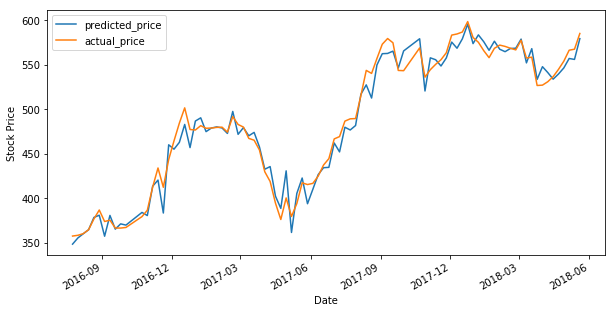

In [133]:
predicted_price = linear.predict(X_test)  

predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])  

predicted_price.plot(figsize=(10,5))  

y_test.plot()  

plt.legend(['predicted_price','actual_price'])  

plt.ylabel("Stock Price")  

plt.show()

In [134]:
stock1.head()

,Price,Price_Change,Return,5W,50W,W3
Date,,,,,,
2009-04-26,431.938997,9.098452,0.021517,444.750220,475.873326,433.975447
2009-05-03,429.573439,-2.365558,-0.005477,440.818116,473.961682,429.971206
2009-05-10,442.291874,12.718435,0.029607,438.790492,471.352954,428.117660
2009-05-17,444.634823,2.342950,0.005297,438.899688,468.561615,434.601436
2009-05-24,444.595732,-0.039091,-0.000088,438.367113,465.453307,438.833379


In [135]:
def mean_absolute_percentage_error(test,predictions): 
    test = np.array(test)
    predictions = np.array(predictions)
    return np.mean(np.abs((test - predictions) / test)) * 100

In [136]:
mean_absolute_percentage_error(y_test,predicted_price)

18.094031403246262

# ARMA

In [137]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA
ar=2
ma=35
# Fit an AR(1) model to the first simulated data
mod = ARMA(stock['Price_Change'], order=(1,1))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for phi
print("When the true phi=0.9, the estimate of phi (and the constant) are:")
print(res.params)

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:           Price_Change   No. Observations:                  477
Model:                     ARMA(1, 1)   Log Likelihood               -1763.780
Method:                       css-mle   S.D. of innovations              9.763
Date:                Fri, 23 Nov 2018   AIC                           3535.559
Time:                        21:06:12   BIC                           3552.230
Sample:                             0   HQIC                          3542.114
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1841      0.706      0.261      0.794      -1.200       1.568
ar.L1.Price_Change     0.6340      0.121      5.221      0.000       0.396       0.872
ma.L1.Price_Change  

In [138]:
stock.index = pd.to_datetime(stock.index, format="%Y/%m/%d")

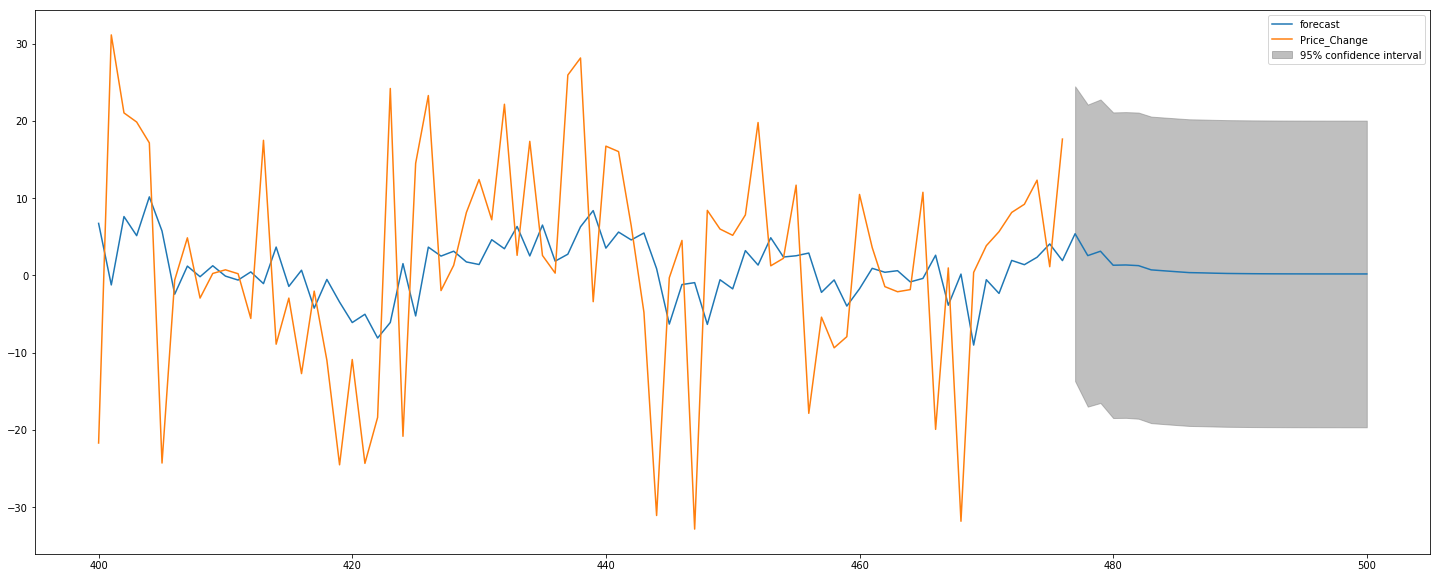

In [162]:
# Forecast the first AR(1) model
mod = ARMA(stock['Price'], order=(0,3))
res.plot_predict(start=400, end=500)
plt.show()

In [140]:
def mean_absolute_percentage_error(test,predictions): 
    test = np.array(test)
    predictions = np.array(predictions)
    return np.mean(np.abs((test - predictions) / test)) * 100

mean_absolute_percentage_error(test,predictions)

NameError: name 'predictions' is not defined

## Above plot shows the direction in which prices are expected to move in. (Mean Reversion)

# AR

In [141]:
#PACF is used to find the order of AR. AIC and BIC can also be used.

In [142]:
from statsmodels.graphics.tsaplots import plot_pacf

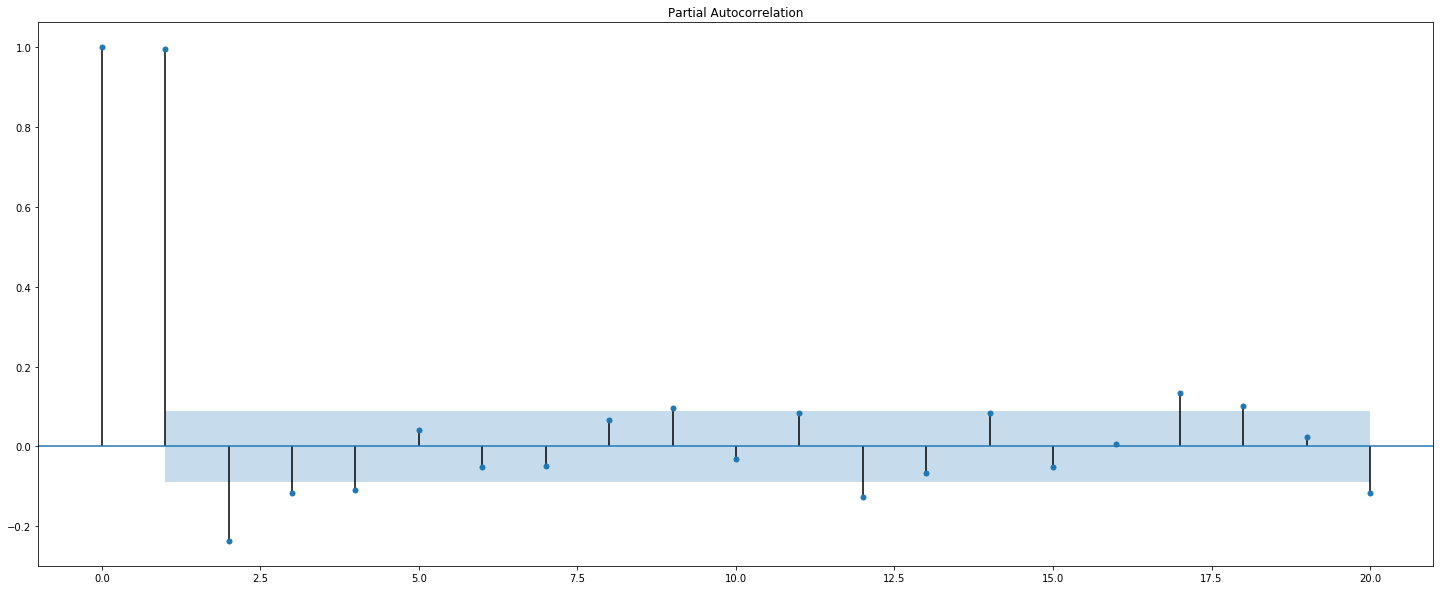

In [143]:
W=plot_pacf(Weekly['Price'].astype(float), lags= 20, alpha=0.05)

### There are two significant lag values. Hence the order of AR model is 2.

Another tool to identify the order of a model is to look at the Akaike Information Criterion (AIC) and the Bayesian Information Criterion (BIC). 
These measures compute the goodness of fit with the estimated parameters, but apply a penalty function on the number of parameters in the model.

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignore

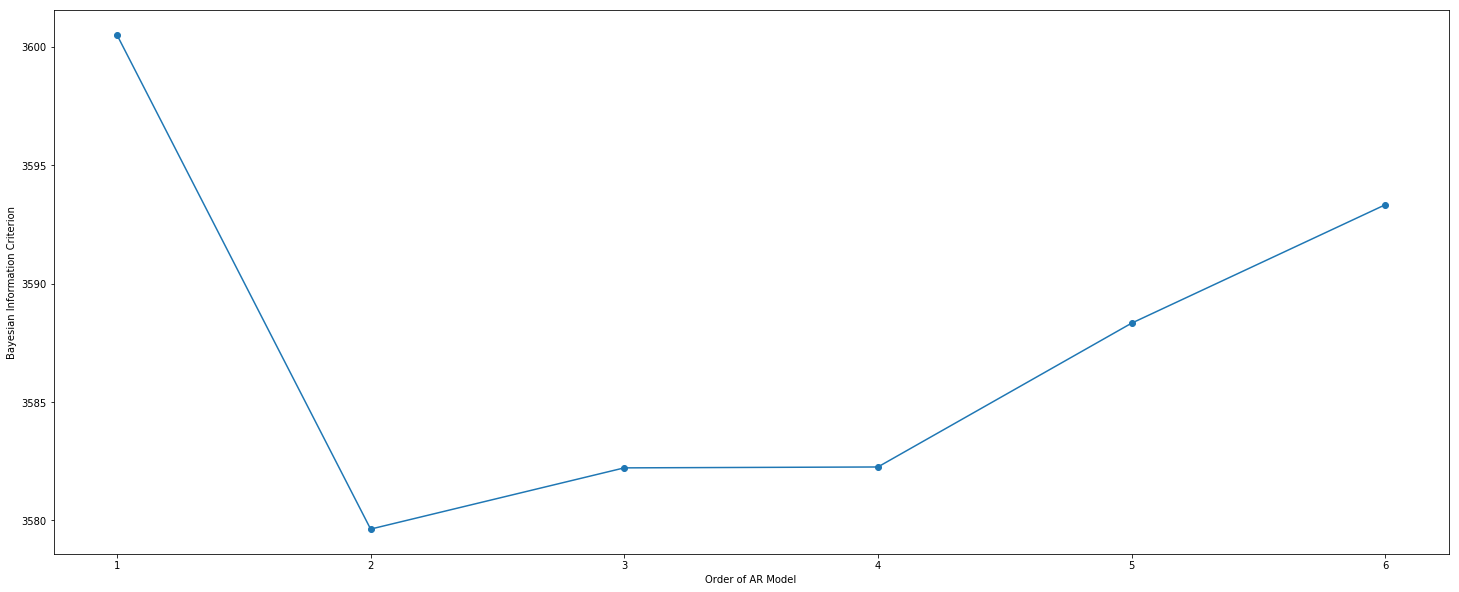

In [144]:
# Import the module for estimating an ARMA model
from statsmodels.tsa.arima_model import ARMA

# Fit the data to an AR(p) for p = 0,...,6 , and save the BIC
BIC = np.zeros(7)
for p in range(7):
    mod = ARMA(stock['Price'], order=(p,0))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.bic
    
# Plot the BIC as a function of p
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

In [145]:
# We can see BIC is minimum for 2. Hence AR(2) model can be used for forecasting

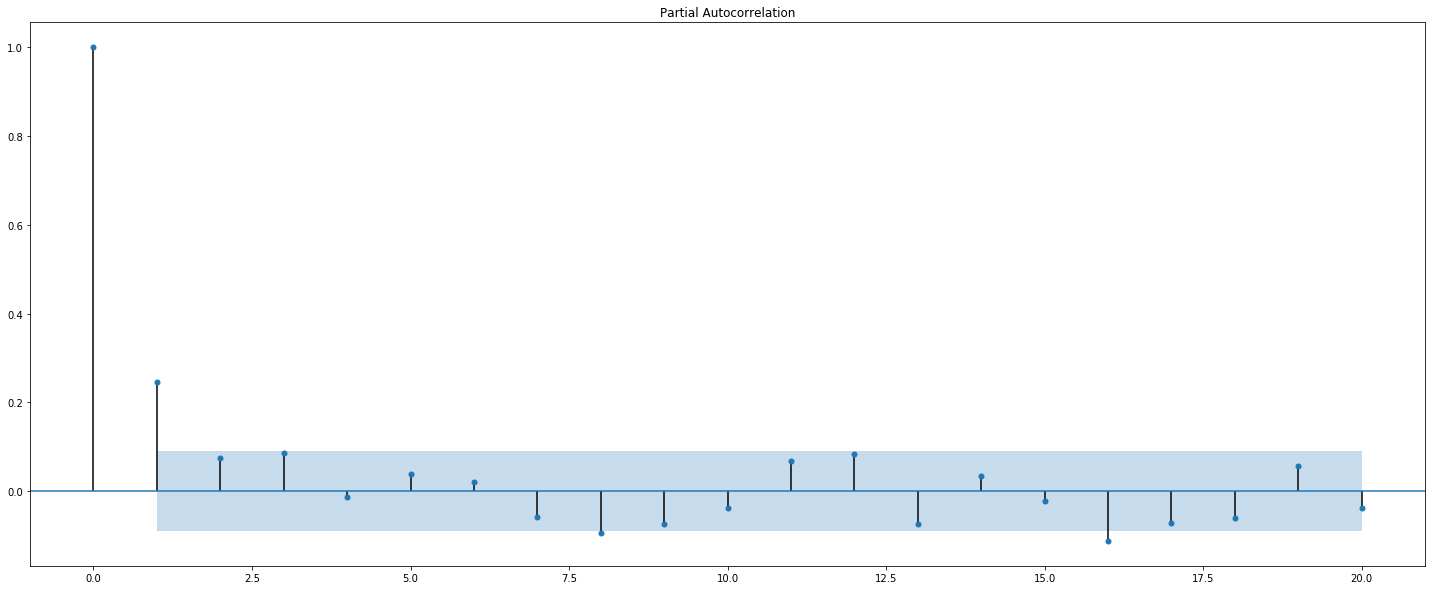

In [146]:
W=plot_pacf(Weekly['Price_Change'].astype(float), lags= 20, alpha=0.05)

In [147]:
p = 1
#AR

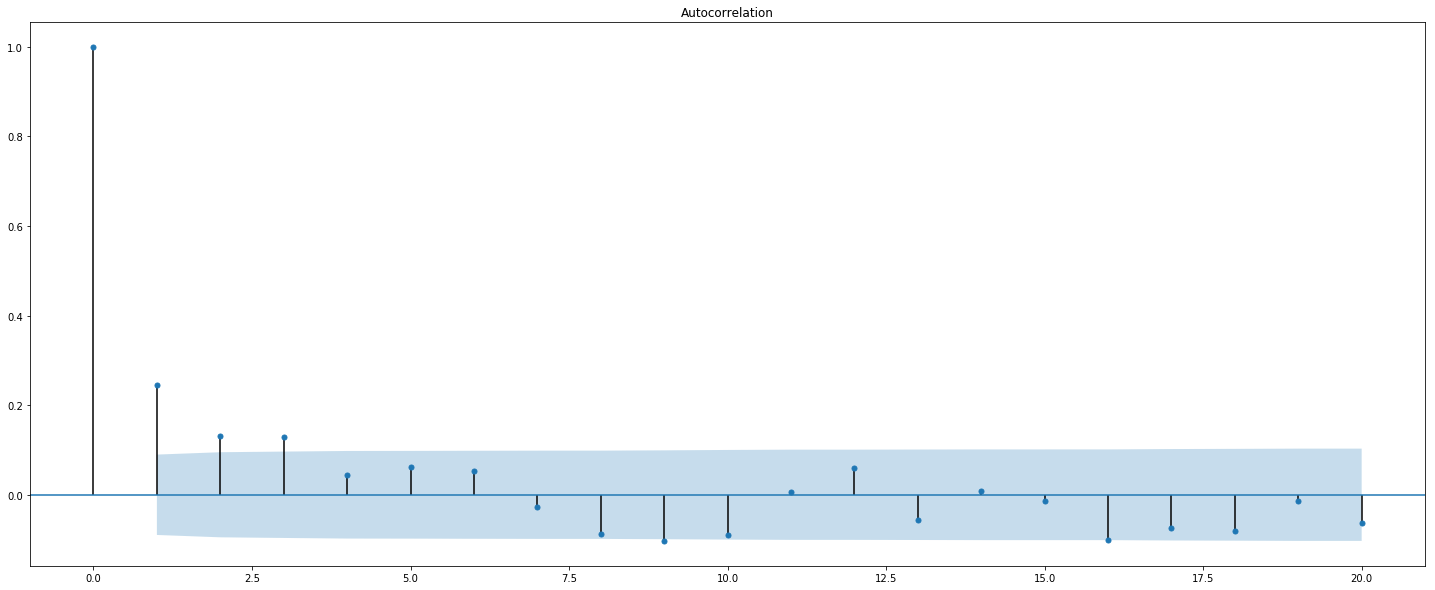

In [148]:
W=plot_acf(Weekly['Price_Change'].astype(float), lags= 20, alpha=0.05)

In [149]:
q = 3
#MA

In [150]:
d = 1
#I

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\hp\Anaconda3\li

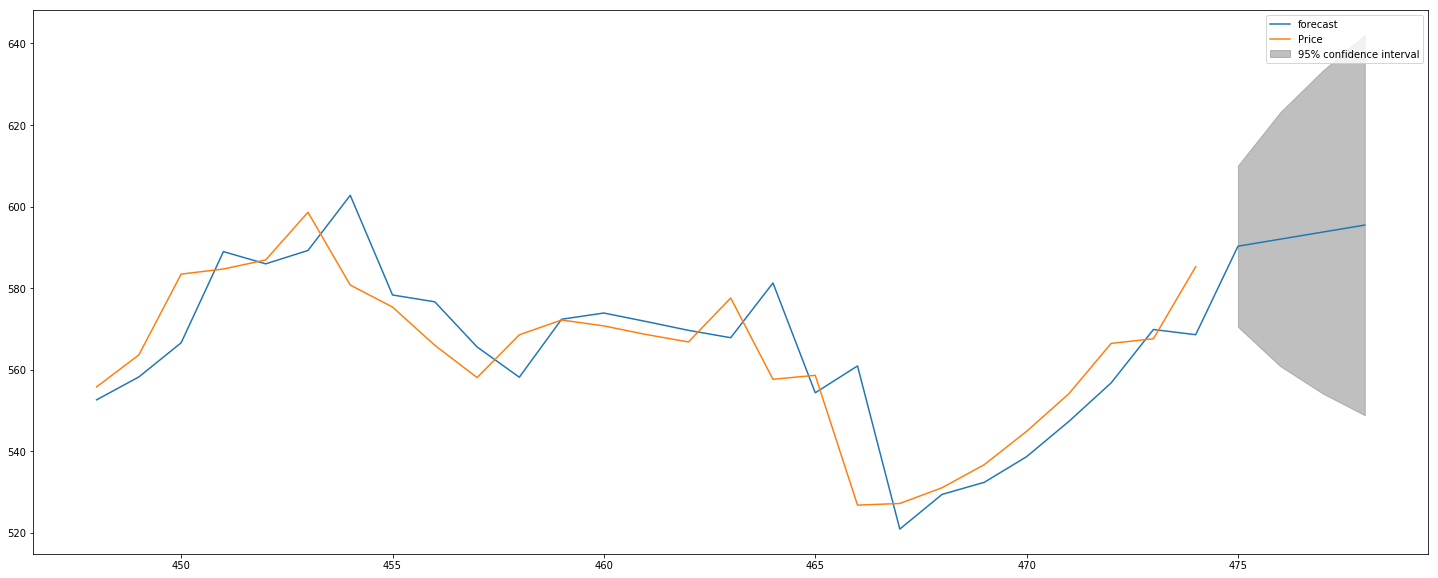

In [151]:
# Import the ARIMA module from statsmodels
from statsmodels.tsa.arima_model import ARIMA


mod = ARIMA(stock['Price'], order=(0,2,2))
res = mod.fit()

# Plot the original series and the forecasted series
res.plot_predict(start=450, end=480)
plt.show()

In [152]:
print(res.summary())

                             ARIMA Model Results                              
Dep. Variable:               D2.Price   No. Observations:                  475
Model:                 ARIMA(0, 2, 2)   Log Likelihood               -1773.813
Method:                       css-mle   S.D. of innovations             10.094
Date:                Fri, 23 Nov 2018   AIC                           3555.626
Time:                        21:08:02   BIC                           3572.280
Sample:                             2   HQIC                          3562.175
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0021      0.009      0.231      0.817      -0.016       0.020
ma.L1.D2.Price    -0.7852      0.044    -18.006      0.000      -0.871      -0.700
ma.L2.D2.Price    -0.1981      0.044

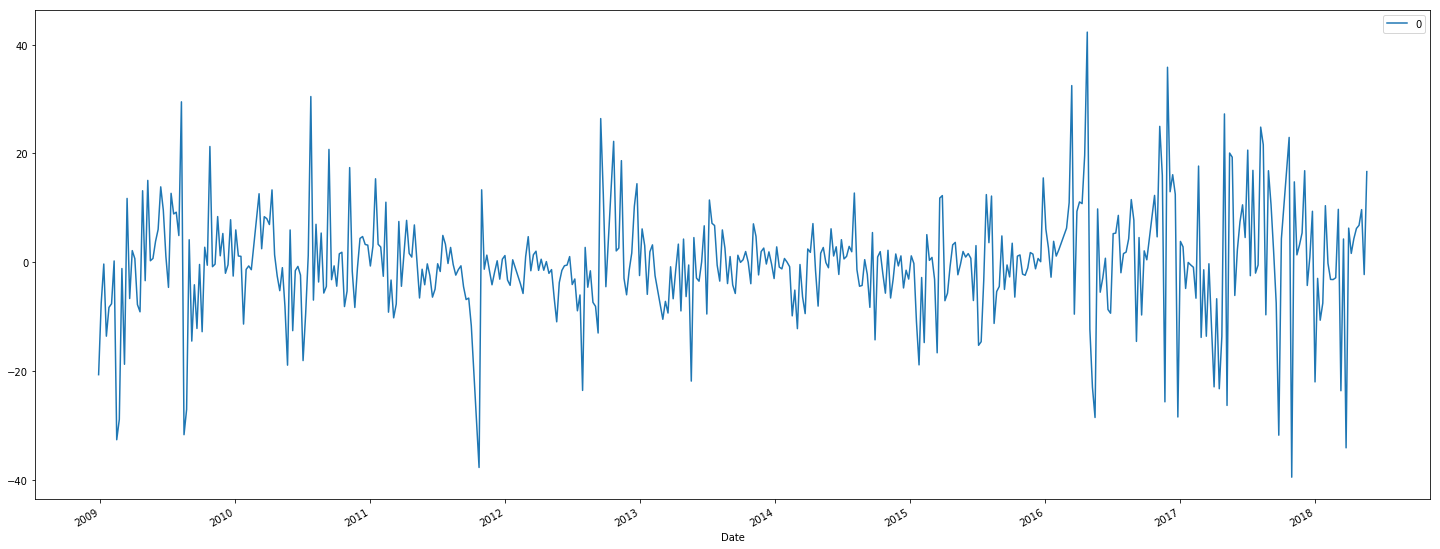

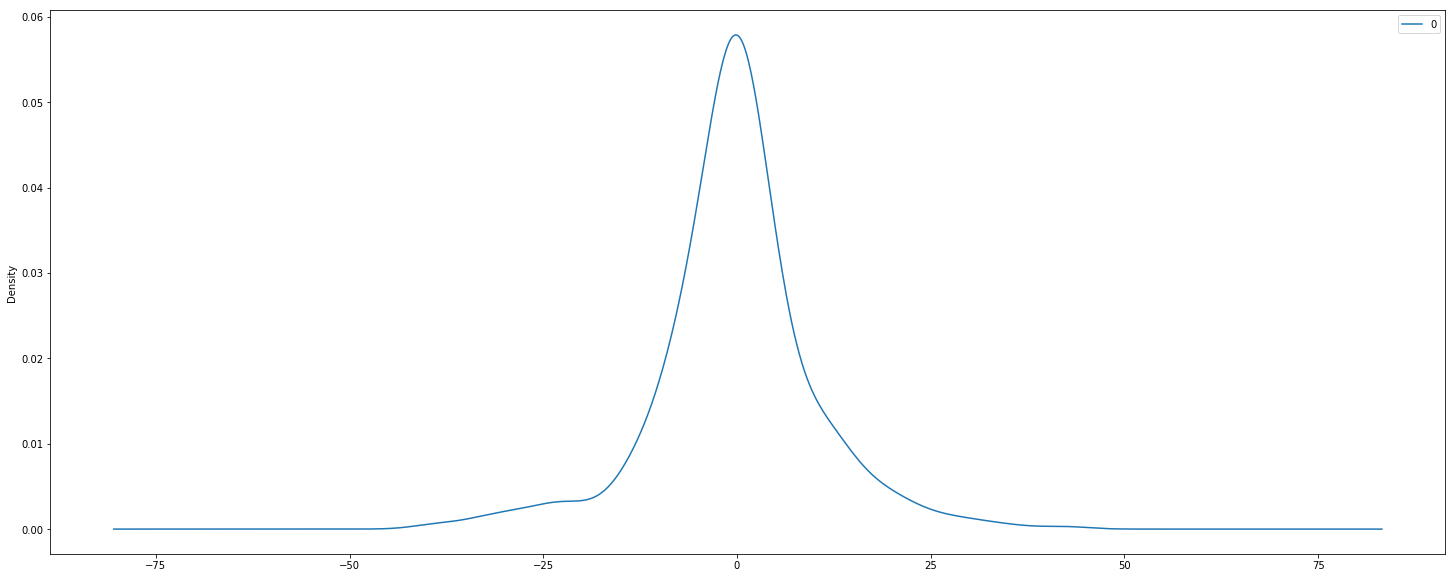

                0
count  475.000000
mean    -0.217126
std     10.160437
min    -39.515383
25%     -4.433236
50%     -0.288231
75%      3.994647
max     42.311500


In [153]:
residuals = pd.DataFrame(res.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [154]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

In [155]:
X = stock['Price']
size = int(len(X) * 0.95)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(1,0,3))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(yhat)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=588.318710, expected=584.704291
predicted=589.517956, expected=586.925700
predicted=590.919880, expected=598.619125
predicted=589.942605, expected=580.770683
predicted=588.976647, expected=575.374372
predicted=588.021958, expected=566.009622
predicted=587.078407, expected=558.088264
predicted=586.145799, expected=568.578978
predicted=585.223886, expected=572.201733
predicted=584.312394, expected=570.756339
predicted=583.411510, expected=568.650692
predicted=582.520994, expected=566.820610
predicted=581.640745, expected=577.591761
predicted=580.770504, expected=557.668364
predicted=579.910505, expected=558.645649
predicted=579.060428, expected=526.825979
predicted=578.219980, expected=527.224057
predicted=577.389104, expected=531.081007
predicted=576.567853, expected=536.752898
predicted=575.756165, expected=544.914770
predicted=574.953514, expected=554.133818
predicted=574.160241, expected=566.472860
predicted=573.376336, expected=567.608165
predicted=572.601194, expected=585

In [156]:
def mean_absolute_percentage_error(test,predictions): 
    test = np.array(test)
    predictions = np.array(predictions)
    return np.mean(np.abs((test - predictions) / test)) * 100

In [157]:
mean_absolute_percentage_error(test,predictions)

3.8176124799509

In [158]:
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.grid()
pyplot.xlabel('Observations')
pyplot.ylabel('Prices ($)')
pyplot.title('Expected values vs. forecast predictions of p1 in test set',fontsize=20)
pyplot.legend(['Expected Values','Forecast Predictions'],fontsize=15)
pyplot.show()

ValueError: view limit minimum -36841.700000000004 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 1800x720 with 1 Axes>

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignore

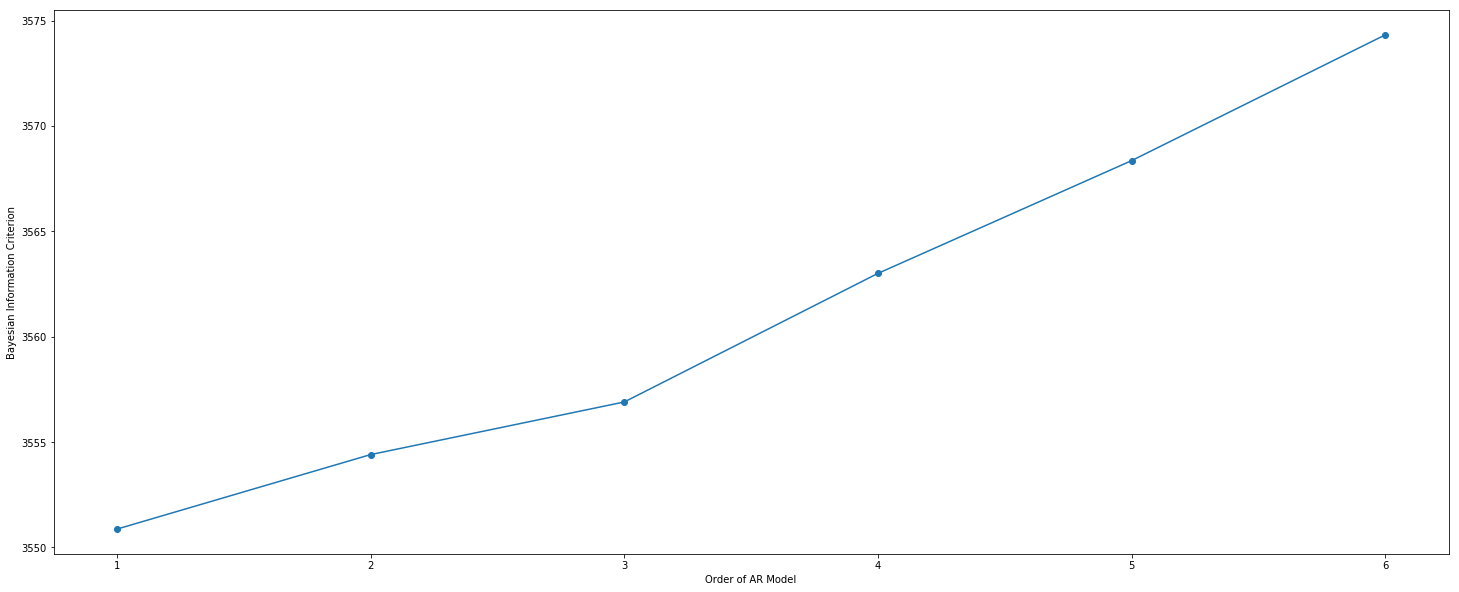

In [159]:
# Import the module for estimating an ARMA model
from statsmodels.tsa.arima_model import ARMA

# Fit the data to an AR(p) for p = 0,...,6 , and save the BIC
BIC = np.zeros(7)
for p in range(7):
    mod = ARMA(stock['Price_Change'], order=(p,0))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.bic
    
# Plot the BIC as a function of p
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()